## **Следующий раздел посвещен векторизации рабочего датасета. Что бы в дальнейшем подавать его на обучение различным моделям.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import json
import pandas as pd
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_root = Path('/home/owl/PycharmProjects/Questions_search_task')

In [3]:
work_dataset = pd.read_csv(path_root / 'dataset_of_questions' /'work_dataset.csv', sep='\t')
work_dataset = work_dataset.drop('Unnamed: 0', axis=1)

In [4]:
work_dataset.head(10)

,line_information,Sign
0,"Все оборудованы эскалаторами , многие лифтами",.
1,"Павел , не соглашусь",.
2,- Как,?
3,Во вторник 20 сентября компания Navis Developm...,.
4,Почему тогда не с ЕР,?
5,"Его можно развернуть за 30 секунд , установить...",.
6,"Я понимаю , что это одно из самых закрытых гос...",?
7,Анекдот На 9 месяце беременности попросила муж...,.
8,Чего добиваются,?
9,Еще в июле нефть торговалась по 147 долларов з...,.


In [7]:
# work_dataset.to_csv('/home/owl/PycharmProjects/Questions_search_task/dataset_of_questions/work_dataset.csv', sep='\t')

In [5]:
def class_return(sign):
    return 1 if sign == '?' else 0


work_dataset['label'] = work_dataset['Sign'].apply(class_return)

In [6]:
work_dataset.head(10)

,line_information,Sign,label
0,"Все оборудованы эскалаторами , многие лифтами",.,0
1,"Павел , не соглашусь",.,0
2,- Как,?,1
3,Во вторник 20 сентября компания Navis Developm...,.,0
4,Почему тогда не с ЕР,?,1
5,"Его можно развернуть за 30 секунд , установить...",.,0
6,"Я понимаю , что это одно из самых закрытых гос...",?,1
7,Анекдот На 9 месяце беременности попросила муж...,.,0
8,Чего добиваются,?,1
9,Еще в июле нефть торговалась по 147 долларов з...,.,0


**pipline** для векторизации **TfidfVectorizer**.



Для того что бы получить из предложения вектор.
- Важно для начала понять как работает **TfidfVectorizer**. Из чего он состоит, как рассчитывается.
- После чего мы должны обучить его. через методо **.fit()** при этом на **fit** мы подаем столбец строк из датасета.
- После того как vectorizer обучился. Мы можем получить из него вектора предложений. Но при этом важно понимать что результаты выполненной работы нигде не сохранятся. Плюс ко всему нужно понимать что обрабатывать строки он будет по бачам. 
- Исходя из вышестоящего пункта появляется необходимость в познании того, как сохранить vectorizer - как записать его в бинарном формате, тоесть *сериализовать* его.
- Соответственно после того как мы сохранили vectorizer, нужно знать, как получить информацию зашитую в неём и хранящую результат векторизации строк датасета - *десирилизовать* файл.


После чего уже можно будет прописать обучения моделей.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [9]:
fit_object = TfidfVectorizer()
fit_object.fit(work_dataset['line_information'])

with open('fit_vectorizer.pkl', 'wb') as fit_file:
    pickle.dump(fit_object, fit_file)

In [11]:
print(type(fit_object))
# print(type(fit_object))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data, test_data, train_label, test_label = train_test_split(work_dataset, work_dataset['label'], test_size=0.3, random_state=0)

In [14]:
with open('fit_vectorizer.pkl', 'rb') as file:
    work_vectorizer_model = pickle.load(file)

In [16]:
fit_work_matrix = fit_object.transform(train_data['line_information'])

## пример для понимания ---------------------------------------------------------------------------------

посчитать tf-ifd для слова **Интересно**

In [14]:
# print(work_dataset['Line information'][2])
# print(work_dataset['Line information'][1])
# print(work_dataset['Line information'][4])

## -------------------------------------------------------------------------------------------------------------------

### Обучение модели **ЛОГИСТИЧЕСКОЙ РЕГРЕСИИ**

### Теория

После осознания того, какую именно задачу требуется решить на этих данных, следующим шагом при реальном анализе был бы подбор подходящего метода. В данном задании выбор метода было произведён за вас, это логистическая регрессия. Кратко напомним вам используемую модель.

Логистическая регрессия предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

где:
- $\pi_{ik}$ - вероятность принадлежности объекта $x_i$ из выборки $X$ к классу $k$
- $\theta$ - внутренние параметры алгоритма, которые настраиваются в процессе обучения, в случае логистической регрессии - $w, b$

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Параметры $w$ и $b$ находятся, как решения следующей задачи оптимизации (указаны функционалы с L1 и L2 регуляризацией, с которыми вы познакомились в предыдущих заданиях):

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - это стандартный гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

In [17]:
train_data.shape

(744856, 3)

In [16]:
# Загрузка сохраненного векторайзера
# with open('fit_vectorizer.pkl', 'rb') as file:
#     work_vectorizer_model = pickle.load(file)
#

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
gscv_obj_3 = GridSearchCV(LogisticRegression(), param_grid, cv=3)
gscv_obj_3.fit(fit_work_matrix, train_label)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [ ]:
# with open('gscv_obj_3.')

## **----------------------------------------------------------------------------

In [19]:
# gscv_obj_5 = GridSearchCV(LogisticRegression(), param_grid, cv=5)
# gscv_obj_5.fit(fit_work_matrix, train_label)

In [20]:
# def plot_scores(optimizer):
#     scores=[]
#     for i in range(len(optimizer.cv_results_['params'])):
#         scores.append([optimizer.cv_results_['params'][i]['C'], 
#                 optimizer.cv_results_['mean_test_score'][i],
#                 optimizer.cv_results_['std_test_score'][i]])
#     scores = np.array(scores)
#     plt.semilogx(scores[:,0], scores[:,1])
#     plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
#                                   scores[:,1]+scores[:,2], alpha=0.3)
#     plt.show()

In [21]:
# plot_scores(gscv_obj_3)

## **----------------------------------------------------------------------------

## **Расчет метрик**

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [22]:
test_work_matrix = fit_object.transform(test_data['line_information'])

In [23]:
best_model = gscv_obj_3.best_estimator_
predict_answer = best_model.predict(test_work_matrix)

In [28]:
predict_answer

array([0, 1, 0, ..., 1, 1, 0])

In [26]:
with open('best_model_logreg.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [25]:
precision_count = precision_score(predict_answer, test_label)
f1_count = f1_score(predict_answer, test_label)
classification_assessment = classification_report(test_label, predict_answer, output_dict=True)

In [26]:
# disp = plot_precision_recall_curve(gscv_obj_3, predict_answer, test_label)
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

In [27]:
# print(f'Метрика precision: {precision_count}')
# print(f'Метрика f1: {f1_count}')
# print(f'Все метрики: \n {classification_assessment}')

In [28]:
for key, value in classification_assessment.items():
    print(key, value)

0 {'precision': 0.8533707510878477, 'recall': 0.8480812740114941, 'f1-score': 0.850717790581808, 'support': 159559}
1 {'precision': 0.849117674519934, 'recall': 0.8543772625355429, 'f1-score': 0.8517393489655689, 'support': 159666}
accuracy 0.8512303234395803
macro avg {'precision': 0.8512442128038908, 'recall': 0.8512292682735185, 'f1-score': 0.8512285697736884, 'support': 319225}
weighted avg {'precision': 0.8512435000163697, 'recall': 0.8512303234395803, 'f1-score': 0.8512287409801212, 'support': 319225}


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.92')

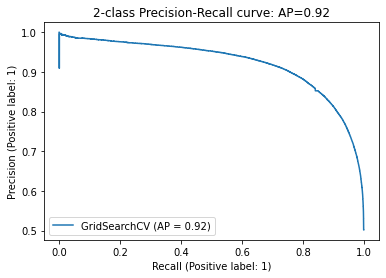

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gscv_obj_3, test_work_matrix, test_label)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={0.92}')

In [30]:
from sklearn.metrics import confusion_matrix

matrix_erorrs = pd.DataFrame()
print(confusion_matrix(test_label, predict_answer))

[[135319  24240]
 [ 23251 136415]]


In [1]:
for key, value in classification_assessment.items():
    print(key, value)

NameError: name 'classification_assessment' is not defined